In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import glob

# Super Mario Bros

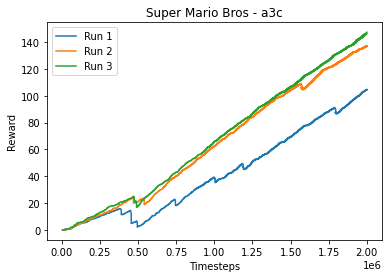

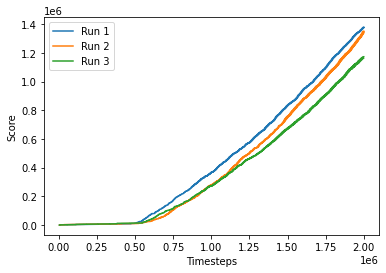

In [140]:
#A3C
files = (glob.glob('csv/mario/a3c/*.csv'))

mario_a3c_train =[]
for i in range(3):
    mario_a3c_train.append(pd.read_csv(files[i],index_col=False))

for i in range(3):
    mario_a3c_train[i]['MeanReward'] = mario_a3c_train[i].groupby('Steps')['Reward'].transform('mean')
    mario_a3c_train[i]['MeanScore'] = mario_a3c_train[i].groupby('Steps')['Score'].transform('mean')
    mario_a3c_train[i]['RewardCumSum'] = mario_a3c_train[i][['MeanReward']].cumsum()
    mario_a3c_train[i]['ScoreCumSum'] = mario_a3c_train[i][['MeanScore']].cumsum()
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()

for index, item in enumerate(mario_a3c_train):
    ax1.plot(item['Steps'],item['RewardCumSum'],label=("Run {}".format(index+1)))
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Reward")
ax1.legend(loc='best')
ax1.set_title('Super Mario Bros - a3c')
fig1.savefig('SMB_a3c_REWARD.pdf')

for index, item in enumerate(mario_a3c_train):
    ax2.plot(item['Steps'],item['ScoreCumSum'],label=("Run {}".format(index+1)))
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Score")
ax2.legend(loc='best')

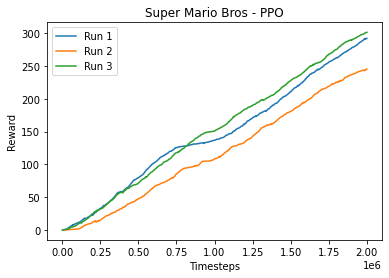

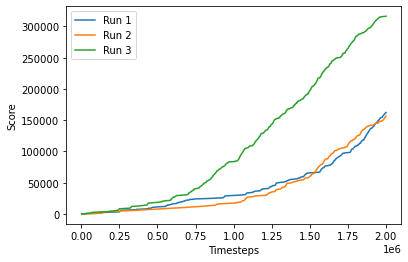

In [137]:
#PPO 
files = (glob.glob('csv/mario/ppo/*.csv'))

mario_ppo_train =[]
for i in range(3):
    mario_ppo_train.append(pd.read_csv(files[i],index_col=False))

for i in range(3):
    mario_ppo_train[i]['MeanReward'] = mario_ppo_train[i][['Reward1','Reward2','Reward3','Reward4']].mean(axis=1)
    mario_ppo_train[i]['MeanScore'] = mario_ppo_train[i][['Score1','Score2','Score3','Score4']].mean(axis=1)
    mario_ppo_train[i]['RewardCumSum'] = mario_ppo_train[i][['MeanReward']].cumsum()
    mario_ppo_train[i]['ScoreCumSum'] = mario_ppo_train[i][['MeanScore']].cumsum()
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()

for index, item in enumerate(mario_ppo_train):
    ax1.plot(item['Steps'],item['RewardCumSum'],label=("Run {}".format(index+1)))
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Reward")
ax1.legend(loc='best')
ax1.set_title('Super Mario Bros - PPO')
fig1.savefig('SMB_PPO_REWARD.pdf')

for index, item in enumerate(mario_ppo_train):
    ax2.plot(item['Steps'],item['ScoreCumSum'],label=("Run {}".format(index+1)))
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Score")
ax2.legend(loc='best')

#mario_ppo_train1['TotalReward'] = mario_ppo_train1['MeanReward'].cumsum()
#mario_ppo_train1['TotalScores'] = mario_ppo_train1['MeanScores'].cumsum()
#mario_ppo_train=mario_ppo_train[1:987]
#mario_ppo_train=mario_ppo_train[::10]

#mario_ppo_test.plot.scatter(x='Steps',y='TotalReward',title="Mario - PPO Test - Reward By Steps")
#mario_ppo_train1.plot(x='Steps',y='Time',title="Mario - PPO Train - Reward By Steps")




# Save